In [1]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots

In [17]:
from statsmodels.stats.outliers_influence \
     import variance_inflation_factor as VIF
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)

In [18]:
auto_data = load_data("Auto") # loading data and checking its columns
auto_data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin'],
      dtype='object')

## Starting to fit the first model

Doing a single fit with year vs mpg.

In [43]:
auto_model_x = pd.DataFrame(
    {
        #"intercept": np.ones(auto_data.ones(auto_data.shape[0])),
        "year": auto_data["year"]
    }
)

auto_model_y = auto_data["mpg"]

model = sm.OLS(auto_model_y, auto_model_x)
results = model.fit()

summarize(results)


,coef,std err,t,P>|t|
year,0.3107,0.005,64.973,0.0


### plot of year vs mpg

In [45]:
def abline(ax, b, m, *args, **kwargs):
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs)

C:\Users\kingo\AppData\Local\Temp\ipykernel_15484\2434041790.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  abline(ax_year_vs_mpg, 0, results.params[0], 'r--', linewidth=3)


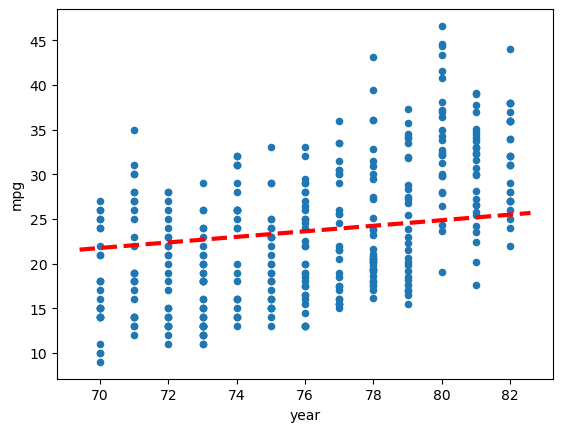

In [90]:
ax_year_vs_mpg = auto_data.plot.scatter("year", "mpg")
abline(ax_year_vs_mpg, 0, results.params[0], 'r--', linewidth=3)

In [24]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    mpg   R-squared (uncentered):                   0.915
Model:                            OLS   Adj. R-squared (uncentered):              0.915
Method:                 Least Squares   F-statistic:                              4222.
Date:                Thu, 13 Jun 2024   Prob (F-statistic):                   1.25e-211
Time:                        20:10:57   Log-Likelihood:                         -1329.7
No. Observations:                 392   AIC:                                      2661.
Df Residuals:                     391   BIC:                                      2665.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
year           0.3107      0.005     64.973      0.000       0.301       0.320
==============================================================================
Omnibus:                       20.967   Durbin-Watson:                   0.606
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.435
Skew:                           0.460   Prob(JB):                     9.93e-05
Kurtosis:                       2.469   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

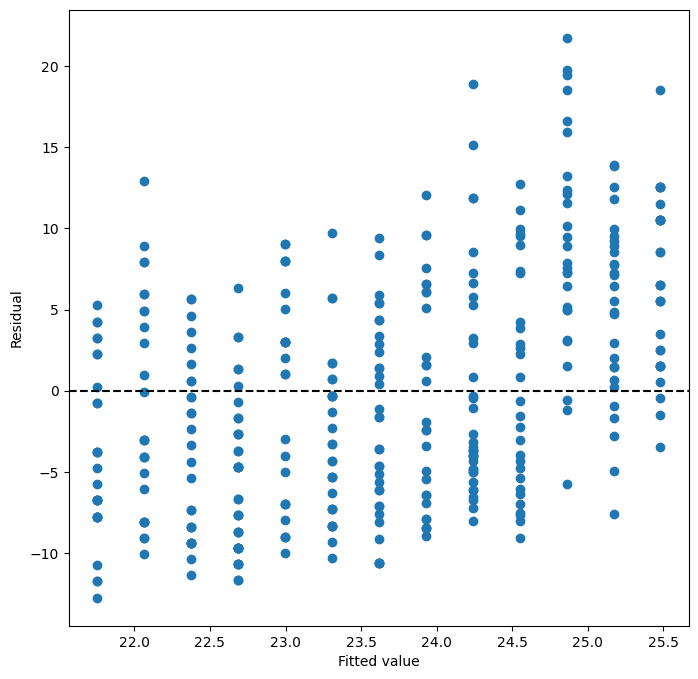

In [33]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(results.fittedvalues, results.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

362

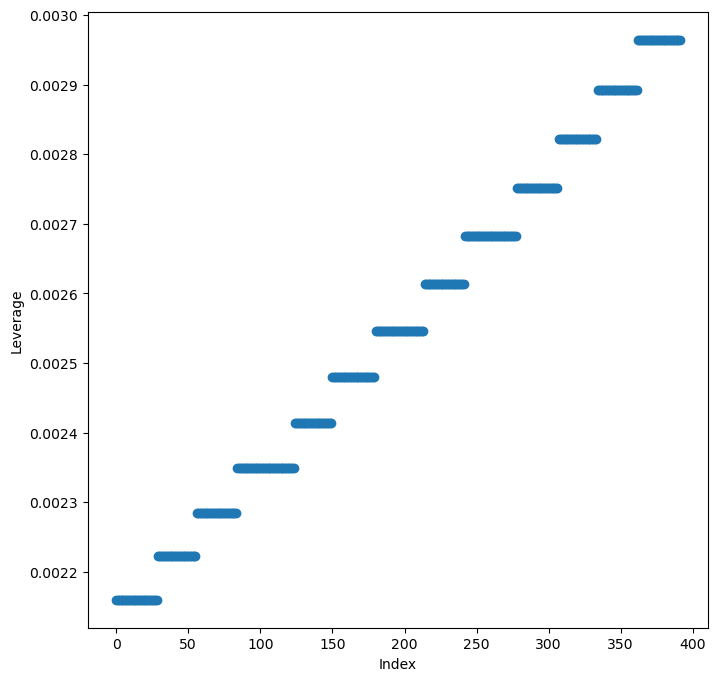

In [53]:
infl = results.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(auto_model_x.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

## Multiple linear Reg fit

In [56]:
auto_multi_x = MS(['year', 'horsepower']).fit_transform(auto_data)
model_1 = sm.OLS(auto_model_y, auto_multi_x)
results_multi = model_1.fit()
summarize(results_multi)

,coef,std err,t,P>|t|
intercept,-12.7392,5.349,-2.382,0.018
year,0.6573,0.066,9.919,0.000
horsepower,-0.1317,0.006,-20.761,0.000


In [59]:
results_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     423.9
Date:                Thu, 13 Jun 2024   Prob (F-statistic):           1.94e-98
Time:                        21:57:57   Log-Likelihood:                -1134.5
No. Observations:                 392   AIC:                             2275.
Df Residuals:                     389   BIC:                             2287.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -12.7392      5.349     -2.382      0.018     -23.256      -2.223
year           0.6573      0.066      9.919      0.000       0.527       0.788
horsepower    -0.1317      0.006    -20.761      0.000      -0.144      -0.119
==============================================================================
Omnibus:                       11.834   Durbin-Watson:                   1.054
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.068
Skew:                           0.400   Prob(JB):                      0.00240
Kurtosis:                       3.316   Cond. No.                     3.20e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

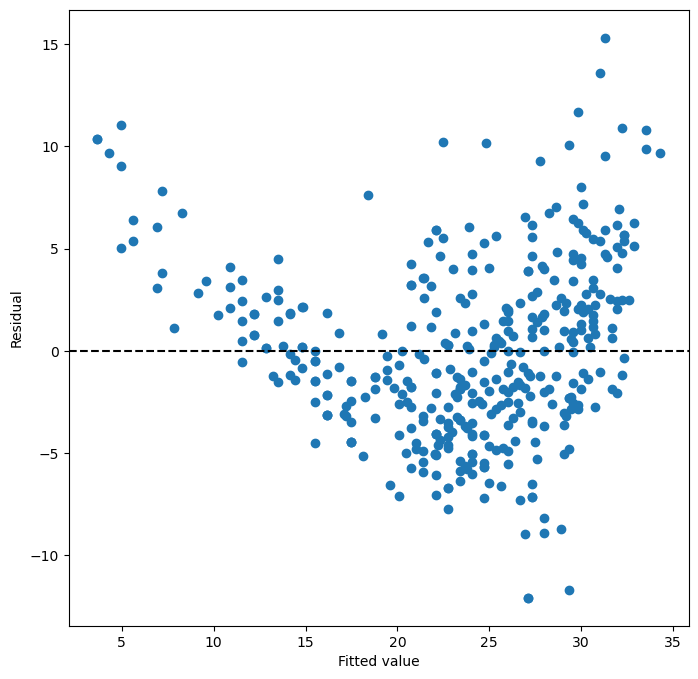

In [60]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(results_multi.fittedvalues, results_multi.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--')

In [62]:
auto_poly_x = MS(['year', 'horsepower', "displacement", "weight"]).fit_transform(auto_data)
model_2 = sm.OLS(auto_model_y, auto_multi_x)
results_poly = model_2.fit()
summarize(results_poly)

,coef,std err,t,P>|t|
intercept,-13.6110,4.198,-3.242,0.001
year,0.7505,0.052,14.312,0.000
horsepower,-0.0067,0.011,-0.628,0.530
displacement,0.0018,0.005,0.343,0.731
weight,-0.0066,0.001,-11.300,0.000


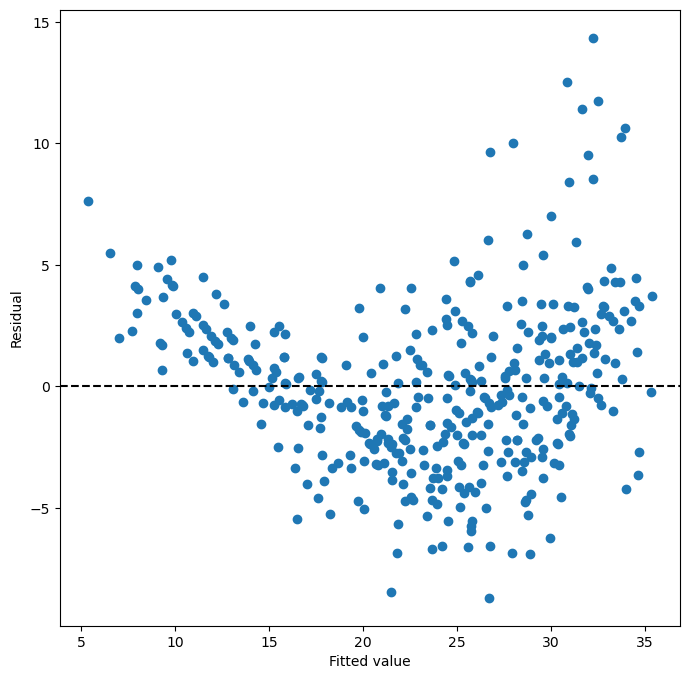

In [63]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(results_poly.fittedvalues, results_poly.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--')

In [72]:
results_poly.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     408.1
Date:                Fri, 14 Jun 2024   Prob (F-statistic):          2.24e-137
Time:                        16:21:49   Log-Likelihood:                -1037.4
No. Observations:                 392   AIC:                             2085.
Df Residuals:                     387   BIC:                             2105.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept      -13.6110      4.198     -3.242      0.001     -21.866      -5.357
year             0.7505      0.052     14.312      0.000       0.647       0.854
horsepower      -0.0067      0.011     -0.628      0.530      -0.028       0.014
displacement     0.0018      0.005      0.343      0.731      -0.009       0.012
weight          -0.0066      0.001    -11.300      0.000      -0.008      -0.005
==============================================================================
Omnibus:                       41.360   Durbin-Watson:                   1.229
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.034
Skew:                           0.666   Prob(JB):                     1.69e-15
Kurtosis:                       4.547   Cond. No.                     7.52e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.52e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [81]:
auto_poly_inter_x = MS(
    [
        'year', 
        "weight", 
        'horsepower', 
        "displacement", 
        ("horsepower", "displacement")
    ]
).fit_transform(auto_data)

model_3 = sm.OLS(auto_model_y, auto_poly_inter_x)

summarize(model_3.fit())

,coef,std err,t,P>|t|
intercept,-3.8049,3.742000,-1.017,0.31
year,0.7466,0.045000,16.420,0.00
weight,-0.0040,0.001000,-7.231,0.00
horsepower,-0.1624,0.017000,-9.815,0.00
displacement,-0.0630,0.007000,-8.556,0.00
horsepower:displacement,0.0005,0.000043,11.345,0.00


In [77]:
results_poly_inter = model_3.fit()
results_poly_inter.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     460.0
Date:                Fri, 14 Jun 2024   Prob (F-statistic):          3.99e-160
Time:                        16:30:09   Log-Likelihood:                -980.96
No. Observations:                 392   AIC:                             1974.
Df Residuals:                     386   BIC:                             1998.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
intercept                  -3.8049      3.742     -1.017      0.310     -11.162       3.552
year                        0.7466      0.045     16.420      0.000       0.657       0.836
weight                     -0.0040      0.001     -7.231      0.000      -0.005      -0.003
horsepower                 -0.1624      0.017     -9.815      0.000      -0.195      -0.130
displacement               -0.0630      0.007     -8.556      0.000      -0.078      -0.049
horsepower:displacement     0.0005   4.31e-05     11.345      0.000       0.000       0.001
==============================================================================
Omnibus:                       41.866   Durbin-Watson:                   1.512
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.500
Skew:                           0.634   Prob(JB):                     2.45e-17
Kurtosis:                       4.754   Cond. No.                     8.05e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.05e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

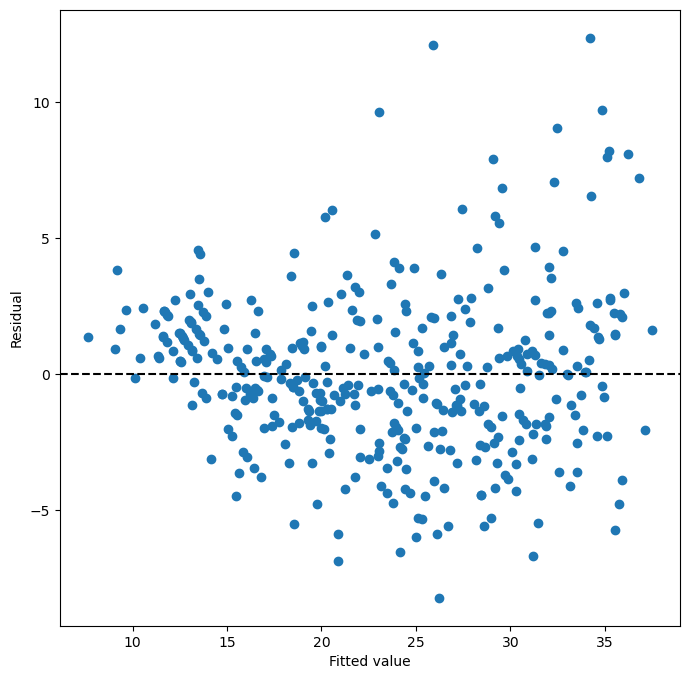

In [80]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(results_poly_inter.fittedvalues, results_poly_inter.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--')